#### Name: 

# PHYS 230 Lab Assignment 5

### Wednesday, February 4, 2026: Chapter 3.3-3.4
- Density plots
- 2D graphics

#### Start by importing any packages you need below (feel free to update as you go):

In [2]:
import math
import turtle
from qdraw import window, circle, draw
import numpy as np
import matplotlib.pyplot as plt

## Catch the errors! (15 pts - 5 pts each)

For each of the following cells, find the error (or errors), and correct it (or them) by:<br> 
    a. add a new markdown cell that describes what was wrong with the code,<br>
    b. creating a new code cell with the corrected code (where possible)<br>
<br>
**Make sure to write in complete sentences; corrected code with a poorly written explanation will not receive better than 4 of 5 points on a given question.** I am not looking for a lengthy explanation; but one that is sufficiently detailed to explain the errors. 

In [6]:
#1 - create a 50 x 100 array of random numbers between 0 and 1 and make a density plot with the origin at the lower left corner
my array = np.random.rand(50,100)
plt.imshow(myarray, origin=lower)

SyntaxError: invalid syntax (3606213124.py, line 2)

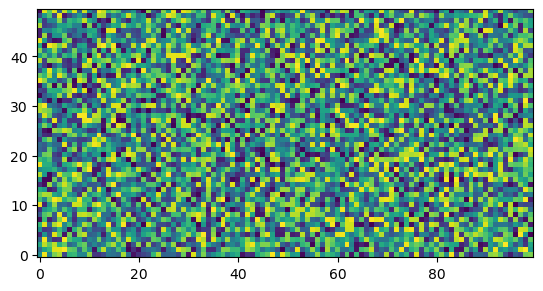

In [7]:
#1 - create a 50 x 100 array of random numbers between 0 and 1 and make a density plot with the origin at the lower left corner
myarray = np.random.rand(50,100)
plt.imshow(myarray, origin='lower')

TypeError: Invalid shape (50,) for image data

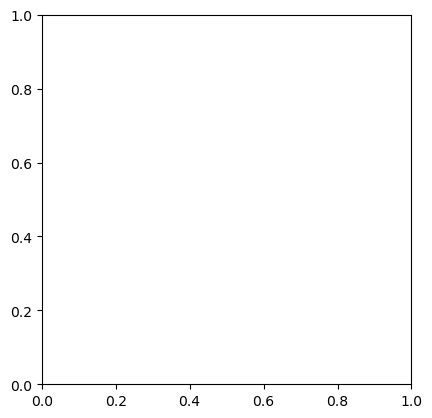

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
x = np.linspace(1,10)
y = np.linspace(10,1)
height = x*y
plt.imshow(height)

The 'height' array is not being defined as a 2D array, but as a multiplication of two 1D arrays, which is still a 1D array. Using the stack command, we can join them along a new axis to create a 2D array. This results in two thin bars that are a bit hard to read, so I used five of each of the 'x' and 'y' arrays, to make the bars for the arrays thicker and easier to see.

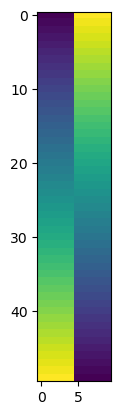

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1,10)
y = np.linspace(10,1)
height = np.stack((x, x, x, x, x, y, y, y, y, y), axis = 1)
plt.imshow(height)

In [16]:
#3 - make a 2D graphic of a circle centered on a,b = 0,0
circle(pos=(a,b), size=1)

NameError: name 'circle' is not defined

Original intent of problem was to use the circle command defined in the qdraw.py file, but I ended up using the turtle package instead. Since the code works, I'll leave it in, but the second of the scripts below is likely closer to what I was supposed to do.

Original script doesn't generate a window for the circle to be drawn in, doesn't define the 'a' and 'b' variables used to set the position of the circle, and doesn't include the draw() command needed to render the circle.

In [2]:
import turtle
t = turtle.Turtle()
t.penup()
t.goto(0, -100)
t.pendown()
t.circle(100)
turtle.done

<function turtle.mainloop()>

In [3]:
from qdraw import window, circle, draw
a = 0
b = 0
window(xlim = [-1, 1], ylim = [-1, 1])
circle(pos = [a,b], size = 1)
draw()

## Short python snippets (10 pts - 5 pts each)
Below each markdow cell, write a short python snippet to perform the indicated action; you will likely have to use google to find out how to perform some of these actions--this is deliberate on my part. Google and *stack overflow* are your friends.<br>
Add a markdown cell to explain your thinking if this is needed.

1. Create a 2D array of random numbers (of your choice) and plot them as a density plot with the origin in the lower left corner. Change the color scheme to some sort of rainbow. 

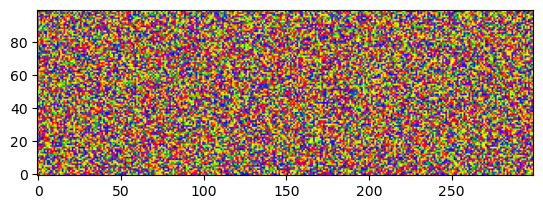

In [7]:
import numpy as np
import matplotlib.pyplot as plt
randbow = np.random.rand(100,300)
plt.imshow(randbow, cmap = 'prism', origin = 'lower')

Script generates a 100 by 300 array of random values, then plots them in a density plot using the prism colormap with the origin set to the lower left corner.

2. In a window with a background color of your choice (not white), create a rectangle at the center with 2 circles in different locations around the window. Make the circles your favorite colors (of those available). 

In [1]:
from qdraw import window, circle, rectangle, draw
window(xlim = [0, 10], ylim = [0, 10], bgcolor = 'dimgray')
rectangle(bottom = -3, top = 3, color = 'firebrick')
circle(pos = [8,2], size = 1, color = 'darkorchid')
circle(pos = [2,8], size = 1, color = 'goldenrod')
draw()

Script creates a gray 11 by 11 window, creates a red rectangle in the middle that extends 3 units from the origin in the up and down directions and 1 unit from the origin in the left and right directions. It then creates a dark purple circle at (8, 2) and a golden circle at (2, 8).

### Write a script 1 
#### Making a density plot of a function

Write a code to do the following: 
- Create a 2D array that shows how the values change linearly from the center outwards based on the equation: 
$$ B = 7.5r - 2.8 $$
    - the overall grid should be 200 x 200 units 
    - you should use a 1000x1000 array
- Plot the array as a density plot, change the color scale to one of your choice, and include a color bar

When your program is complete, add a markdown cell below it to explain your process and program. 

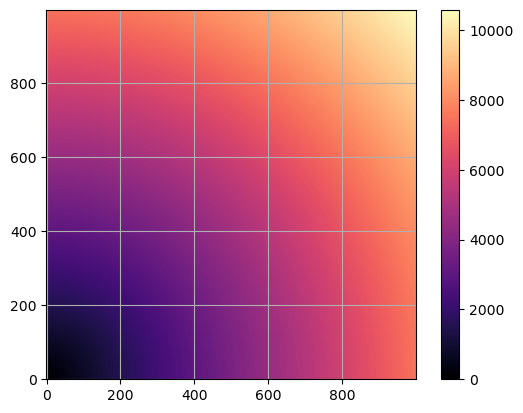

In [19]:
import numpy as np
import matplotlib.pyplot as plt
ix = 0
iy = 0
rad = np.empty(shape = (1000, 1000))

for x in rad:
    iy = 0
    for y in x:
        rad[ix, iy] = math.sqrt((ix ** 2) + (iy ** 2))
        iy += 1
    ix += 1
B = (7.5 * rad) - 2.8
plt.imshow(B, cmap = 'magma', origin = 'lower')
plt.grid()
plt.colorbar()

Script creates a empty 1000 by 1000 array, along with two index variables. It then goes up each column of the empty array and uses the Pythagorean theorem to calculate how "far" that cell is from the cell at index [0, 0] based on the index variables, with it starting on the next column after finishing one. This repeats until every value of the 'rad' array is filled, when it is used to calculate a second array based on the equation given in the question. This array is then plotted on a density map and a color scale generated.

### Write a script 2
#### Making 2D objects - making a slice of pizza

Write a code to do the following: 
- Create a window that is 4 x 4
- Make a slice of pepperoni using the following objects:
    - A polygon (triangle) for the slice
    - A rectangle for the crust
    - Circles for the slices of pepperoni
- Make the background white and remember the cheese is yellow!

When your program is complete, add a markdown cell below it to explain your process and program. 

In [3]:
from qdraw import window, circle, rectangle, polygon, draw
window(xlim = [0, 4], ylim = [0, 4], bgcolor = 'white')
polygon([[3, 3], [1, 3], [2, 1]], pos = (0, 0), color = 'gold')
rectangle(left = -1, right = 1.1, bottom = -0.1, top = 0.3, color = 'sandy brown', pos = (2, 3))
circle(pos = [2,1.7], size = 0.5, color = 'firebrick')
circle(pos = [2.5,2.6], size = 0.5, color = 'firebrick')
circle(pos = [1.7,2.5], size = 0.5, color = 'firebrick')
draw()

The script creates a 5 by 5 window with a white background, a yellow polygon with three vertices at (3, 3), (1, 3), and (2, 1), a rectangle located at (2, 3) that covers the top of the polygon, and three circles placed over the polygon.